**Teoretiska frågor**

1. **Beskriv kort hur en relationsdatabas fungerar.**  
   En relationsdatabas är en typ av databas som strukturerar och lagrar information i tabeller bestående av rader och kolumner. Datan har ofta en relation mellan varandra. Varje tabell fokuserar på en specifik typ av data, till exempel kunder, produkter eller beställningar, och kopplingarna mellan dessa data hanteras med hjälp av primärnycklar och främmande nycklar.

2. **Vad menas med “CRUD”-flödet?**  
   CRUD står för Create, Read, Update och Delete. Dessa representerar de fyra huvudsakliga funktionerna för att arbeta med data i en databas eller ett informationssystem. Dessa fyra funktioner används för att skapa, läsa, ändra och radera data och används för att interagera med och hantera information på ett systematiskt sätt.

3. **Beskriv kort vad en “left join” och en “inner join” är. Varför använder man det?**  
   En left join och en inner join används för att lägga samman data från två eller fler tabeller i en databas med hjälp av ett gemensamt fält:  
   - **Left join**: Används för att hämta alla rader från den vänstra (första) tabellen och matchande rader från den högra tabellen. Om inga matchade värden återfinns returneras NULL-värden från den högra tabellen. Detta används när man vill få fram alla värden även fast det inte finns några matchande värden i den andra tabellen.  
   - **Inner join**: Används när man vill hämta rader då det finns en matchning mellan två tabeller. Rader utan matchningar exkluderas. Detta är användbart när man enbart vill ha data som existerar i båda tabellerna.

4. **Beskriv kort vad indexering i SQL innebär.**  
   Indexering används så att man kan hämta data ur databasen på ett snabbare och mer effektivt sätt. När en tabell indexeras skapar databasen en separat struktur som lagrar de indexerade kolumnerna tillsammans med respektive rader. När man sedan gör queries, kan databasen snabbt hämta datan med hjälp av indexeringen och hämta de relevanta raderna istället för att söka igenom hela tabellen.

5. **Beskriv kort vad en vy i SQL är.**  
   En vy fungerar som en virtuell tabell baserat på en query. Den sparar ingen data utan visar data som är sparad i andra tabeller. Vyer används ofta för att förenkla komplexa frågor genom att definiera dem till ett enda objekt, förbättra läsbarheten eller begränsa åtkomsten till viss data genom att visa enbart relevanta kolumner eller rader.

6. **Beskriv kort vad en lagrad procedur i SQL är.**  
   Lagrade procedurer i SQL är redan förskrivna funktioner som är sparade i databasen. Dessa kan användas för att utföra specifika uppgifter såsom att skapa queries, uppdatera data eller liknande. Eftersom dessa “funktioner” redan är sparade i databasen gör det att processen går fortare att utföra.


In [ ]:
pip install pandas matplotlib sqlalchemy pyodbc

## **Programmeringsuppgift**

Företaget AdventureWorks är ett företag som säljer cyklar, cykeltillbehör, cykelkomponenter och cykelkläder.  
Databasen består av fem olika scheman, där varje schema innehåller egna tabeller för respektive schema.  

Dessa scheman är:  
- **HumanResources**  
- **Person**  
- **Production**  
- **Purchasing**  
- **Sales**  

Vi kan börja med att analysera alla fem scheman för att beskriva datan som finns.

### **HUMAN RESOURCES**  
Från HumanResources-schemat kan vi utläsa att företaget har totalt **296 anställda** fördelade över **16 kategorier**.  
- Flest antal anställda (**180 st**) har avdelningen **"Production"**.  
- Minst antal anställda har avdelningen **"Executive"** med endast **2 anställda**.


In [ ]:
from sqlalchemy import create_engine
import pandas as pd

engine = create_engine("mssql+pyodbc://KOMPJUTER/AdventureWorks2022?driver=SQL+Server&trusted_connection=yes")

query = """
SELECT TOP 10 *
FROM Person.Person
"""
data = pd.read_sql_query(query, engine)
print(data)


In [ ]:
from sqlalchemy import create_engine
import pandas as pd

#  Anslut till SQL Server
engine = create_engine("mssql+pyodbc://KOMPJUTER/AdventureWorks2022?driver=SQL+Server&trusted_connection=yes")

# Fråga för att hämta alla tabeller från alla scheman
tables_query = """
SELECT 
    s.name AS SchemaName,
    t.name AS TableName
FROM 
    sys.tables t
JOIN 
    sys.schemas s ON t.schema_id = s.schema_id
ORDER BY 
    s.name, t.name;
"""

# Kör och ladda frågan i Pandas DataFrame
tables = pd.read_sql_query(tables_query, engine)

# Visa resultat
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Visa tabeller
print(tables)

# Spara resultat i csv fil
tables.to_csv("all_database_tables.csv", index=False)


In [ ]:
# Hämta anställda per avdelning
query = """
SELECT 
    COALESCE(d.Name, 'Unassigned') AS Department, 
    COUNT(DISTINCT e.BusinessEntityID) AS Headcount
FROM 
    HumanResources.Employee e
LEFT JOIN 
    HumanResources.EmployeeDepartmentHistory edh ON e.BusinessEntityID = edh.BusinessEntityID
LEFT JOIN 
    HumanResources.Department d ON edh.DepartmentID = d.DepartmentID
GROUP BY 
    d.Name
ORDER BY 
    Headcount DESC;
"""

# Kör frågan och visa resultat
department_data = pd.read_sql_query(query, engine)

# Skriv ut result
print(department_data)


In [ ]:
import matplotlib.pyplot as plt

# Data för diagramm för Anställda per avdelning
departments = department_data['Department']
headcounts = department_data['Headcount']

# Skapa stabeldiagram
plt.figure(figsize=(12, 6))
bars = plt.bar(departments, headcounts, color='skyblue', edgecolor='black')

# Lägg till labels and title
plt.xlabel('Department', fontsize=12)
plt.ylabel('Headcount', fontsize=12)
plt.title('Headcount per Department', fontsize=14)

# Lägg till nummer över varje stapel
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f'{int(height)}',
        ha='center', va='bottom', fontsize=10
    )

# Rotera x-axel labels för bättre läsbarhet
plt.xticks(rotation=45, ha='right', fontsize=10)

# Lägg till gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Visa diagrammet
plt.tight_layout()
plt.show()


## **Könsfördelningen**

I AdventureWorks visar en tydlig dominans av män bland de anställda, där **71 % är män** och endast **29 % är kvinnor**.  

Detta kan bero på branschspecifika faktorer, såsom historiska normer eller arbetsuppgifter som traditionellt har lockat fler män.  
Samtidigt utgör detta en möjlighet att arbeta för en mer jämställd representation inom företaget.  

Att adressera dessa skillnader kan bidra till att skapa en mer inkluderande och diversifierad arbetsmiljö som gynnar både organisationen och dess medarbetare.


In [ ]:
# Hämta könsfördelning
query = """
SELECT Gender, COUNT(BusinessEntityID) AS Count
FROM HumanResources.Employee
GROUP BY Gender
"""
gender_data = pd.read_sql_query(query, engine)
print(gender_data)



In [ ]:
plt.figure(figsize=(8, 6))
plt.pie(gender_data['Count'], labels=gender_data['Gender'], autopct='%1.1f%%', colors=['blue', 'pink'])
plt.title("Gender Distribution")
plt.tight_layout()
plt.show()


## **PERSON**

Person-schemat kopplar samman alla företagets affärsenheter med personer, deras kontaktuppgifter och roller.  

Diagrammet nedan illustrerar **topp 10** antal anställda per stad i USA.  
Vi kan utläsa att flest anställda finns i **Seattle med 44 personer**, medan minst anställda finns i **Bothell med 12 anställda**.
.


In [ ]:
# Hämta anställda per avdelning
query = """
SELECT d.Name AS Department, COUNT(e.BusinessEntityID) AS Headcount
FROM HumanResources.Department d
JOIN HumanResources.EmployeeDepartmentHistory edh
    ON d.DepartmentID = edh.DepartmentID
JOIN HumanResources.Employee e
    ON e.BusinessEntityID = edh.BusinessEntityID
GROUP BY d.Name
ORDER BY Headcount DESC
"""
department_data = pd.read_sql_query(query, engine)
print(department_data.head())

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Hämta anställda per stad
query = """
SELECT 
    a.City,
    COUNT(p.BusinessEntityID) AS EmployeeCount
FROM 
    Person.Person p
LEFT JOIN 
    Person.BusinessEntityAddress ba ON p.BusinessEntityID = ba.BusinessEntityID
LEFT JOIN 
    Person.Address a ON ba.AddressID = a.AddressID
WHERE 
    p.PersonType = 'EM'
GROUP BY 
    a.City
ORDER BY 
    EmployeeCount DESC;
"""

# Kör frågan
city_data = pd.read_sql_query(query, engine)

# Filtrera städer med anställda för bättre läsbarhet
city_data = city_data[city_data['EmployeeCount'] > 0]

# Limitera till top 10 städer med flest anställda
top_10_cities = city_data.nlargest(10, 'EmployeeCount')

# Visa antal och procent
def autopct_with_counts(pct, all_vals):
    absolute = int(round(pct / 100. * sum(all_vals)))
    return f"{pct:.1f}%\n({absolute})"

# Skapa paj diagram för top 10 städer
plt.figure(figsize=(10, 8))
plt.pie(
    top_10_cities['EmployeeCount'], 
    labels=top_10_cities['City'], 
    autopct=lambda pct: autopct_with_counts(pct, top_10_cities['EmployeeCount']), 
    startangle=140
)
plt.title('Top 10 Cities with the Most Employees')
plt.tight_layout()
plt.show()




In [ ]:
from sqlalchemy import create_engine
import pandas as pd

# Anslut till SQL Server
engine = create_engine("mssql+pyodbc://KOMPJUTER/AdventureWorks2022?driver=SQL+Server&trusted_connection=yes")

# Hämta produktkategorier
categories_query = """
SELECT 
    ProductCategoryID,
    Name AS CategoryName
FROM 
    Production.ProductCategory;
"""

# Visa resultat
categories = pd.read_sql_query(categories_query, engine)

# Visa alla rader
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(categories)




## **PURCHASING**

Purchasing-schemat innehåller bland annat information om AdventureWorks återförsäljare, ordrar och leveranssätt.  

Tabellen nedan illustrerar en graf på de tio största återförsäljarna hos AdventureWorks, baserat på inköpssumma (USD).



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# Anslut till databasen
engine = create_engine("mssql+pyodbc://KOMPJUTER/AdventureWorks2022?driver=SQL+Server&trusted_connection=yes")

# SQL-fråga
query = """
SELECT 
    TOP 10 -- Visa bara de 10 bästa leverantörerna för tydlighet
    v.Name AS VendorName,
    COUNT(po.PurchaseOrderID) AS PurchaseCount,
    SUM(pod.LineTotal) AS TotalSpent
FROM 
    Purchasing.Vendor v
LEFT JOIN 
    Purchasing.PurchaseOrderHeader po ON v.BusinessEntityID = po.VendorID
LEFT JOIN 
    Purchasing.PurchaseOrderDetail pod ON po.PurchaseOrderID = pod.PurchaseOrderID
GROUP BY 
    v.Name
ORDER BY 
    TotalSpent DESC;
"""

# Hämta data
purchasing_data = pd.read_sql_query(query, engine)

print(purchasing_data)

# Plot stapeldiagram
plt.figure(figsize=(12, 6))
bars = plt.barh(purchasing_data['VendorName'], purchasing_data['TotalSpent'], color='skyblue')

# Lägg till etiketter på staplarna
for bar in bars:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2, f'{xval:,.2f}', ha='left', va='center', fontsize=10)

# Diagraminställningar
plt.title('Top 10 Vendors by Total Spending', fontsize=16)
plt.xlabel('Total Spent (in currency)', fontsize=12)
plt.ylabel('Vendor Name', fontsize=12)
plt.gca().invert_yaxis()  # Vänd ordningen så att den största leverantören är överst
plt.tight_layout()

# Visa diagrammet
plt.show()

## **SALES**

Sales-schemat innehåller information om AdventureWorks försäljningar. Tabellerna i denna kategori innehåller bland annat information om kunder, valuta, säljare, säljskatt och omsättning.  

Tabellen nedan illustrerar företagets omsättning år 2011–2014. Ur den kan vi utläsa att:  
- **Mest omsättning hade företaget år 2013 (43,662,479 USD).**  
- **Minst omsättning hade företaget år 2011 (12,641,672 USD).**

AdventureWorks visar en årlig omsättning som sträcker sig från mer än 12 miljoner dollar till över 43 miljoner dollar.  
Datan visar en stadig ökning mellan åren 2011 och 2013. Denna ökning kan indikera en stabil efterfrågan samt effektiv försäljningsstrategi.  

Under 2014 visas en kraftig minskning jämfört med föregående år. Denna nedgång beror dock inte på verklig minskning av försäljning utan snarare på ofullständig data från andra halvan av 2014, vilket ger en missvisande bild i diagrammet.  

En annan tydlig förändring observeras mellan år 2011 och 2012, där omsättningen ser ut att öka mycket. Detta beror på att data endast finns tillgänglig från och med maj 2011, vilket gör att omsättningen för 2011 är baserad på ett ofullständigt år.  
Trots detta fortsätter trenden att visa en ökning mellan 2012 och 2013, vilket ger en indikation på företagets tillväxt och framgång under denna period.
. 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# Anslut till databasen
engine = create_engine("mssql+pyodbc://KOMPJUTER/AdventureWorks2022?driver=SQL+Server&trusted_connection=yes")

# SQL-fråga
query = """
SELECT 
    YEAR(soh.OrderDate) AS SalesYear,
    SUM(sod.LineTotal) AS TotalRevenue
FROM 
    Sales.SalesOrderHeader soh
JOIN 
    Sales.SalesOrderDetail sod ON soh.SalesOrderID = sod.SalesOrderID
GROUP BY 
    YEAR(soh.OrderDate)
ORDER BY 
    SalesYear;
"""

# Hämta data
revenue_data = pd.read_sql_query(query, engine)

# Plot stapeldiagram
plt.figure(figsize=(10, 6))
bars = plt.bar(revenue_data['SalesYear'], revenue_data['TotalRevenue'], color='skyblue')

# Lägg till etiketter ovanför varje stapel
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5000, f'{yval:,.0f}', ha='center', va='bottom', fontsize=10)

# Diagraminställningar
plt.title('Revenue by Year in AdventureWorks', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Revenue (in currency)', fontsize=12)
plt.xticks(revenue_data['SalesYear'])
plt.tight_layout()

# Visa diagrammet
plt.show()


## **Del två: Analysdelen**

**Gör en statistisk analys av valfri del av datan.**  
Hur tolkar du resultaten?

Den data som är mest intressant för mig att undersöka och analysera är AdventureWorks ekonomiska prestation med fokus på den årliga omsättningen.  
För att uppnå detta kommer jag att genomföra en statistisk analys med hjälp av både hypotesprövning och beräkning av ett konfidensintervall.  
Det jag vill komma fram till är att utvärdera stabiliteten i försäljningen över olika år och identifiera potentiella avvikelser som kan påverka företagets prestation.

Som vi kan se med hjälp av graferna ovan finns det skillnader i den årliga omsättningen mellan åren 2011 och 2014.  
Där är **2013** året med mest försäljning.

### **Hypoteser**
För att genomföra analysen ställs följande hypoteser upp:  
- **Nollhypotes (H₀):** µ₁ = µ₂, vilket innebär att den genomsnittliga omsättningen för två olika år är densamma.  
- **Alternativ hypotes (H₁):** µ₁ > µ₂, vilket innebär att den genomsnittliga omsättningen för det ena året är högre än för det andra.

### **Beräkning av 95 % konfidensintervall**
Utöver detta beräknas ett 95 % konfidensintervall för den genomsnittliga årliga omsättningen.  
Konfidensintervallet används här för att uppskatta det sanna medelvärdet för omsättningen och dess osäkerhet.

- **Genomsnittlig årlig omsättning:** 27,461,595.35  
- **Standardavvikelse:** 13,812,735.26  
- **Antal år (n):** 4  

- **95 % Konfidensintervall:** (5,482,451.21, 49,440,739.49)  
  Med hjälp av beräkningen kommer vi fram till att konfidensintervallet ger oss en indikation på hur mycket den genomsnittliga omsättningen kan variera mellan olika år.


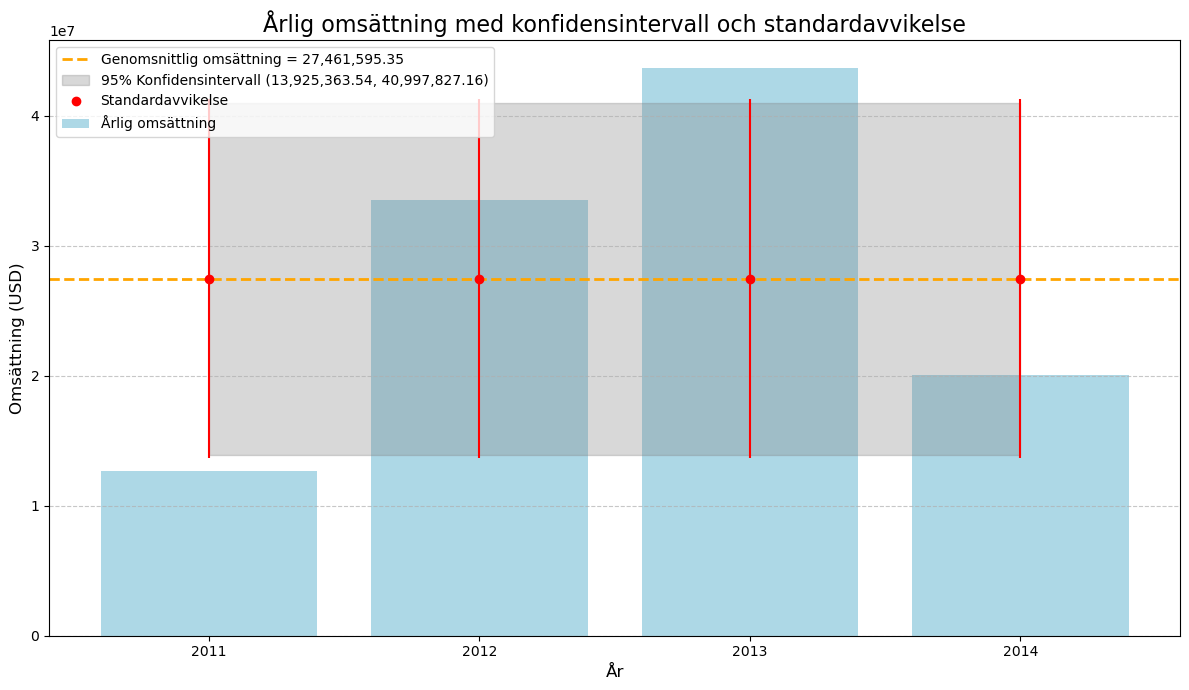

In [219]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# Anslut till databasen
engine = create_engine("mssql+pyodbc://KOMPJUTER/AdventureWorks2022?driver=SQL+Server&trusted_connection=yes")

# SQL-fråga för att hämta årlig omsättning
query = """
SELECT 
    YEAR(soh.OrderDate) AS SalesYear,
    SUM(sod.LineTotal) AS TotalRevenue
FROM 
    Sales.SalesOrderHeader soh
JOIN 
    Sales.SalesOrderDetail sod ON soh.SalesOrderID = sod.SalesOrderID
GROUP BY 
    YEAR(soh.OrderDate)
ORDER BY 
    SalesYear;
"""

# Hämta data från databasen
revenue_data = pd.read_sql_query(query, engine)

# Beräkna genomsnitt, standardavvikelse och konfidensintervall
mean_revenue = revenue_data['TotalRevenue'].mean()
std_dev_revenue = revenue_data['TotalRevenue'].std()
n_years = len(revenue_data)

# 95 % konfidensintervall
confidence = 0.95
z_score = norm.ppf((1 + confidence) / 2)
margin_of_error = z_score * (std_dev_revenue / np.sqrt(n_years))
confidence_interval = (mean_revenue - margin_of_error, mean_revenue + margin_of_error)

# Skapa diagrammet
plt.figure(figsize=(12, 7))

# Årlig omsättning (ljusblå staplar)
plt.bar(revenue_data['SalesYear'], revenue_data['TotalRevenue'], color='lightblue', label='Årlig omsättning')

# Genomsnittlig omsättning (orange streckad linje)
plt.axhline(mean_revenue, color='orange', linestyle='--', linewidth=2, label=f'Genomsnittlig omsättning = {mean_revenue:,.2f}')

# 95% konfidensintervall (grått skuggat område)
plt.fill_between(
    revenue_data['SalesYear'], 
    confidence_interval[0], 
    confidence_interval[1], 
    color='gray', 
    alpha=0.3, 
    label=f'95% Konfidensintervall ({confidence_interval[0]:,.2f}, {confidence_interval[1]:,.2f})'
)

# Standardavvikelse (röd punkt och linje)
for year, revenue in zip(revenue_data['SalesYear'], revenue_data['TotalRevenue']):
    plt.plot(year, mean_revenue, 'ro', label='Standardavvikelse' if year == revenue_data['SalesYear'][0] else "")
    plt.vlines(year, mean_revenue - std_dev_revenue, mean_revenue + std_dev_revenue, color='red', linestyle='-', linewidth=1.5)

# diagrammet
plt.title('Årlig omsättning med konfidensintervall och standardavvikelse', fontsize=16)
plt.xlabel('År', fontsize=12)
plt.ylabel('Omsättning (USD)', fontsize=12)
plt.xticks(revenue_data['SalesYear'])
plt.legend(loc='upper left', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Visa diagrammet
plt.tight_layout()
plt.show()


## **Grafen Visar:**

1. **Årlig omsättning (ljusblå staplar):**  
   Representerar omsättningen för varje år.

2. **Genomsnittlig omsättning (orange streckad linje):**  
   Markerar medelvärdet av omsättningen, som är **27,461,595.35 USD**.

3. **95% konfidensintervall (grått skuggat område):**  
   Intervallet från **5,482,451.21 USD** till **49,440,739.49 USD** visar osäkerheten kring medelvärdet.

4. **Standardavvikelse (röd punkt och linje):**  
   Den röda punkten markerar medelvärdet, och linjen visar standardavvikelsen (**13,812,735.26 USD**).
SD).


Graferna visar den årliga omsättningen för AdventureWorks mellan fyra år, där det genomsnittliga värdet är **27,461,595.35 USD**.  
Standardavvikelsen på **13,812,735.26 USD** indikerar en viss variation mellan åren, medan det breda **95% konfidensintervallet (5,482,451.21 - 49,440,739.49 USD)** antyder osäkerhet kring det genomsnittliga värdet.

Detta betyder att AdventureWorks har upplevt stora skillnader i sin ekonomiska prestation mellan åren, vilket bör analyseras vidare för att identifiera bakomliggande faktorer.  
Standardavvikelsen är avgörande för att förstå spridningen i den årliga omsättningen, eftersom den visar hur mycket omsättningen varierar från genomsnittet.

I vårt fall, med en standardavvikelse på **13,812,735.26 USD**, framgår det att det finns en viss variation mellan de olika åren, vilket tyder på att omsättningen inte är helt stabil.  
Detta kan indikera påverkan från externa faktorer som marknadsförändringar eller interna strategier.

För AdventureWorks är denna information viktig för att identifiera möjliga orsaker till variationen och för att utveckla strategier för att förbättra den ekonomiska stabiliteten framöver.


In [213]:
import pandas as pd
from sqlalchemy import create_engine

# Anslut till databasen
engine = create_engine("mssql+pyodbc://KOMPJUTER/AdventureWorks2022?driver=SQL+Server&trusted_connection=yes")

# Hämta data för försäljningsdata för aktuella år
query = """
SELECT 
    YEAR(soh.OrderDate) AS SalesYear,
    MONTH(soh.OrderDate) AS SalesMonth,
    COUNT(sod.SalesOrderID) AS TransactionsCount,
    SUM(sod.LineTotal) AS MonthlyRevenue
FROM 
    Sales.SalesOrderHeader soh
JOIN 
    Sales.SalesOrderDetail sod 
ON 
    soh.SalesOrderID = sod.SalesOrderID
WHERE 
    YEAR(soh.OrderDate) IN (2011, 2012, 2013, 2014)
GROUP BY 
    YEAR(soh.OrderDate), MONTH(soh.OrderDate)
ORDER BY 
    SalesYear, SalesMonth;
"""

# Hämta data
sales_data = pd.read_sql_query(query, engine)

# Skapa lista för månader för åren 2011-2014
all_years = range(2011, 2015)  # 2011 to 2014
all_months = range(1, 13)  # January to December
full_index = pd.MultiIndex.from_product(
    [all_years, all_months], names=["SalesYear", "SalesMonth"]
)

# Inkludera alla månader
sales_data.set_index(["SalesYear", "SalesMonth"], inplace=True)
sales_data = sales_data.reindex(full_index).reset_index()  # NaN (Not a Number för månader utan data)

# Formatera datan
sales_data["SalesMonth"] = sales_data["SalesMonth"].map({
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
})

# Skapa årstabell
table = sales_data.pivot(index="SalesMonth", columns="SalesYear", values="MonthlyRevenue")

# Sortera nånader (January to December)
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
table = table.reindex(month_order)

# Formatera nummer
table = table.map(lambda x: f"{x:,.0f}" if pd.notnull(x) else "")

# Visa tabell
print("Ordered Monthly Revenue Table (2011 - 2014):")
print(table)

# Spara till csv fil
table.to_csv("Ordered_Monthly_Revenue_Table_2011_2014.csv")


Ordered Monthly Revenue Table (2011 - 2014):
SalesYear        2011       2012       2013       2014
SalesMonth                                            
Jan                    3,970,627  2,087,872  4,289,818
Feb                    1,475,427  2,316,922  1,337,725
Mar                    2,975,748  3,412,069  7,217,531
Apr                    1,634,601  2,532,266  1,797,174
May           503,806  3,074,603  3,245,624  5,366,675
Jun           458,911  4,099,354  5,081,069     49,006
Jul         2,044,600  3,417,954  4,896,354           
Aug         2,495,817  2,175,637  3,333,964           
Sep           502,074  3,454,152  4,532,909           
Oct         4,588,762  2,544,091  4,795,813           
Nov           737,840  1,872,702  3,312,130           
Dec         1,309,863  2,829,405  4,075,487           


## **Nu analyseras år 2013 omsättning per region.**

- **Genomsnittlig försäljning per region:** 4,896,288.80 USD  
- **Standardavvikelse:** 2,416,724.12 USD  
- **95 % konfidensintervall:** 3,398,415.19 USD - 6,394,162.40 USD  
- **Antal regioner (n):** 10
                                               = 10


Genomsnittlig försäljning per region: 4,896,288.80
Standardavvikelse: 2,416,724.12
95% konfidensintervall: 3,398,415.19 - 6,394,162.40


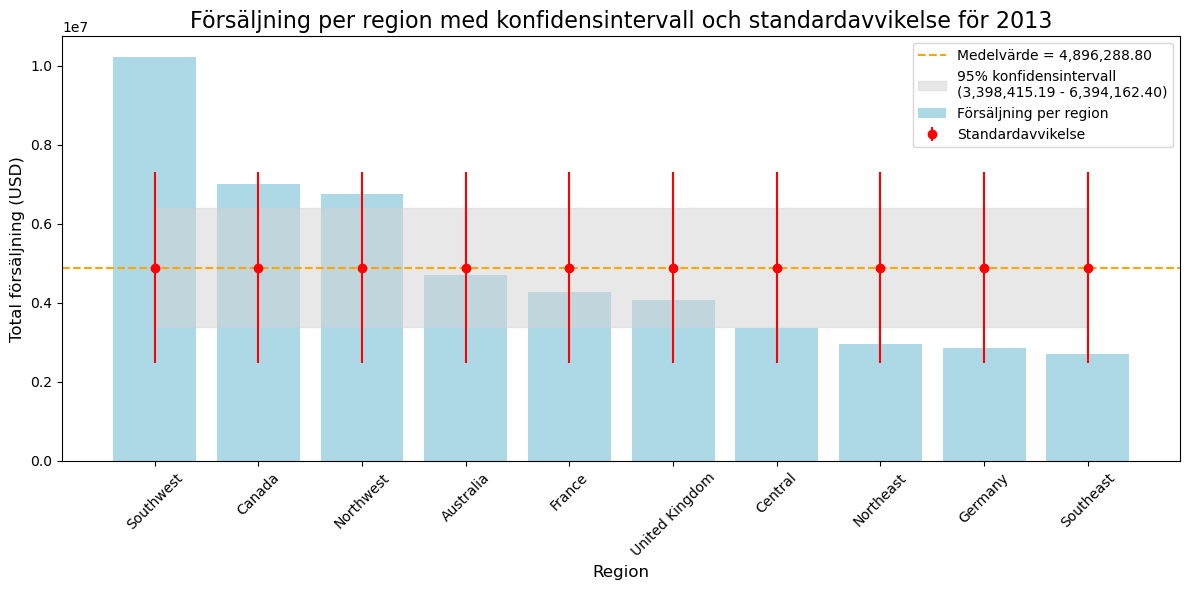

In [215]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Simulerad data från SQL-resultat
data = {
    "Region": ["Southwest", "Canada", "Northwest", "Australia", "France", "United Kingdom", "Central", "Northeast", "Germany", "Southeast"],
    "TotalSales": [10239209.34, 7010449.7, 6759500.67, 4702404.05, 4271019.27, 4068178.67, 3374336.29, 2965567.03, 2866491.97, 2705730.97]
}

df = pd.DataFrame(data)

# Beräkna medelvärde och standardavvikelse
mean_sales = df["TotalSales"].mean()
std_dev_sales = df["TotalSales"].std()
n = len(df)

# Beräkna 95 % konfidensintervall
confidence = 0.95
z_score = norm.ppf((1 + confidence) / 2)
margin_of_error = z_score * (std_dev_sales / np.sqrt(n))
confidence_interval = (mean_sales - margin_of_error, mean_sales + margin_of_error)

# Visa resultaten
print(f"Genomsnittlig försäljning per region: {mean_sales:,.2f}")
print(f"Standardavvikelse: {std_dev_sales:,.2f}")
print(f"95% konfidensintervall: {confidence_interval[0]:,.2f} - {confidence_interval[1]:,.2f}")

# Visualisera
plt.figure(figsize=(12, 6))

# Staplar för försäljning per region
plt.bar(df["Region"], df["TotalSales"], color="lightblue", label="Försäljning per region")

# Medelvärde som orange linje
plt.axhline(mean_sales, color="orange", linestyle="--", label=f"Medelvärde = {mean_sales:,.2f}")

# 95 % konfidensintervall som grått skuggat område
plt.fill_between(
    range(len(df)), confidence_interval[0], confidence_interval[1],
    color="lightgrey", alpha=0.5, label=f"95% konfidensintervall\n({confidence_interval[0]:,.2f} - {confidence_interval[1]:,.2f})"
)

# Standardavvikelse som röda punkter och linjer
for i, sales in enumerate(df["TotalSales"]):
    plt.errorbar(i, mean_sales, yerr=std_dev_sales, fmt='o', color='red', label="Standardavvikelse" if i == 0 else "")

# Lägg till etiketter och titlar
plt.title("Försäljning per region med konfidensintervall och standardavvikelse för 2013", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total försäljning (USD)", fontsize=12)
plt.xticks(range(len(df)), df["Region"], rotation=45)
plt.legend()
plt.tight_layout()

# Visa grafen
plt.show()

## Staplar och Linjer i Diagrammet

- **Staplar (ljusblå):**  
  Visar försäljning per region.

- **Medelvärde (orange linje):**  
  Representerar genomsnittlig försäljning över alla regioner.

- **Konfidensintervall (grått skuggat område):**  
  Anger intervallet där det genomsnittliga värdet sannolikt ligger med **95 % säkerhet**.

- **Standardavvikelse (röda punkter och linjer):**  
  Visar hur mycket försäljningen varierar kring medelvärdet. Röda punkter markerar medelvärdet, och linjerna representerar standardavvikelsen.


## **Analysera datan och resultaten du tagit fram**  
**Vilka slutsatser och rekommendationer kan du ge?**

AdventureWorks årliga ekonomiska prestation har analyserats med fokus på omsättningen mellan åren 2011 och 2014.  
Denna period visar betydande variationer i omsättningen, och analysen syftar till att utvärdera stabiliteten, identifiera potentiella avvikelser och ge rekommendationer för att förbättra den ekonomiska utvecklingen.  
Genom att använda statistiska metoder, inklusive hypotesprövning och konfidensintervallberäkningar, kan vi skapa en djupare förståelse för företagets prestation under dessa år.

- **Genomsnittlig omsättning:** 27,461,595.35 USD  
- **95 % konfidensintervall för genomsnittlig omsättning:** 13,925,363.54 - 40,997,827.16 USD  
- **Standardavvikelse:** 13,812,735.26 USD  

Dessa siffror visar en stor osäkerhet och hög variation i omsättningen mellan åren.  
År **2012** och **2013** sticker ut som år med högre omsättning jämfört med de andra åren.

### **Slutsats**
Omsättningen är inte jämnt fördelad mellan åren. Det finns stora skillnader i omsättning:  
- År **2011** och **2014** visar betydligt lägre omsättning än åren **2012** och **2013**.  
- Den stora avvikelsen beror inte på externa faktorer, utan på att företaget saknar dokumenterad omsättning under fyra månader år 2011 och under det andra halvåret 2014.  

Detta gör det svårt att ge konkreta rekommendationer baserat på dessa år. Därför analyseras istället omsättning **per region** för år **2013**, då omsättningen var som högst.  

### **Observationer: Försäljning per region med konfidensintervall och standardavvikelse för 2013**  
- **Genomsnittlig försäljning per region:** 4,896,288.80 USD  
- **95 % konfidensintervall:** 3,398,415.19 - 6,394,162.40 USD  
- **Högsta försäljning (Southwest):** 10,239,209.34 USD  
- **Lägsta försäljning (Southeast):** 2,705,730.97 USD  

**Noteringar:**  
- Regionen **Southwest** har markant högre försäljning än andra regioner och är en tydlig toppregion.  
- Regionen **Southeast** har lägst försäljning, vilket kan indikera låg efterfrågan eller mindre marknadsnärvaro.

### **Rekommendationer**
1. **Analysera skillnaden i försäljning mellan regioner:**  
   - Företaget bör undersöka de låga försäljningssiffrorna i regionerna **Southeast** och **Tyskland**.  
   - Ta reda på om de låga siffrorna beror på mindre efterfrågan eller mindre marknadsnärvaro.  

2. **Investera i kvalitativ datainsamling:**  
   - Analysera försäljningsdata från olika regioner, inklusive demografisk information, kundbeteende och marknadstrender.  
   - Baserat på orsaken till låga siffror kan specifika strategier utvecklas för att öka försäljningen i dessa regioner.  

3. **Fokusera på marknadsföring och produktutveckling:**  
   - Implementera fler marknadsföringskampanjer med regionala och säsongsanpassade kampanjer.  
   - Öka fokus på lokala behov och introducera nya produkter som är anpassade för specifika marknader.  

4. **Studera framgångsfaktorer i Southwest-regionen:**  
   - Utför en djupanalys av vad som gör Southwest till en framgångsrik marknad.  
   - Försök att implementera dessa framgångsfaktorer i andra regioner.  
   - Introducera **premiumprodukter** i Southwest-regionen för att maximera intäkterna från denna redan starka marknad.  

AdventureWorks har potential att förbättra sin försäljning genom att agera på de insikter som har framkommit i denna analys.

               

# Executive Summary

AdventureWorks är ett företag som fokuserar på cyklar och relaterade produkter. En analys av företagets databas, AdventureWorks2022, har identifierat flera viktiga insikter som rör personal, produktutbud och försäljningsprestationer.

Företaget har totalt **296 anställda**, varav **71 % är män**, vilket belyser en ojämn könsfördelning. Majoriteten av de anställda är geografiskt koncentrerade i **Seattle**, som har flest anställda, medan andra regioner har betydligt färre. Produktsortimentet domineras av **komponenter (134 produkter)**, följt av cyklar och kläder.

Omsättningsdata för perioden **2011–2014** visar en topp på **43,7 miljoner USD** under **2013** och ett genomsnitt på **27,5 miljoner USD**. Variationen mellan åren är stor, och nedgången **2014** beror främst på ofullständig data, vilket begränsar analysens tillförlitlighet. En mer detaljerad analys av **2013** avslöjar att **Southwest-regionen** presterade bäst (**10,2 miljoner USD**), medan **Southeast** hade den lägsta omsättningen (**2,7 miljoner USD**). Standardavvikelser och konfidensintervall understryker osäkerheten och variationerna i prestation mellan regionerna och åren.

---

## Rekommendationer

1. **Förbättrad datainsamling**:  
   Säkerställ fullständig och konsekvent datainsamling för att möjliggöra mer pålitliga analyser.

2. **Regional analys**:  
   Undersök orsakerna bakom låga försäljningssiffror i specifika regioner som Southeast och anpassa strategier därefter.

3. **Använd framgångsstrategier**:  
   Implementera framgångsrika metoder från Southwest i andra marknader.

4. **Marknadsföring och produktanpassning**:  
   Investera i riktade kampanjer och utveckla produkter för att möta lokala behov, särskilt i underpresterande regioner.

---

Genom att agera på dessa rekommendationer kan AdventureWorks stärka sin marknadsposition, öka sin ekonomiska stabilitet och främja en hållbar affärsutveckling.


## Min mungtliga presentation är den 3 januari##

In [173]:
!git init

Reinitialized existing Git repository in C:/Users/anaba/.git/


In [161]:
!git fetch origin


In [230]:
!git pull origin main


Already up to date.


From https://github.com/Ana-Anchy/SQL-kunskapskontroll
 * branch            main       -> FETCH_HEAD


In [169]:
import os
print(os.getcwd())

C:\Users\anaba


In [232]:
!git add TestSQL.ipynb

In [234]:
!git commit -m "Updated TestSQL.ipynb"


[main e022aaf] Updated TestSQL.ipynb
 1 file changed, 126 insertions(+), 51 deletions(-)


In [236]:
!git push -u origin main

branch 'main' set up to track 'origin/main'.


To https://github.com/Ana-Anchy/SQL-kunskapskontroll.git
   53966fc..e022aaf  main -> main
